<a href="https://colab.research.google.com/github/TomChen7896/final_abalone/blob/main/Data_Processing_and_EDA_cc7896.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the Age of Abalones based on Physical Data

###Data Pre-processing and Preliminary Examination

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [30]:
pip install ucimlrepo

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# drop rows with null values
df = df.dropna()

# display the first few rows of the DataFrame
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
from google.colab import drive
drive.mount('/content/drive')

# save the dataframe into a csv file in Google Drive and then store in the GitHub Repository
df.to_csv('/content/drive/My Drive/abalone.csv', index=False)

Mounted at /content/drive


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [34]:
# check the min and max of longest shell measurement
print(df['Length'].min())
print(df['Length'].max())

0.075
0.815


In [35]:
# check the min and max of diameter
print(df['Diameter'].min())
print(df['Diameter'].max())

0.055
0.65


In [36]:
# check the min and max of height
print(df['Height'].min())
print(df['Height'].max())

0.0
1.13


In [37]:
# check the min and max of the weight of the whole abalone
print(df['Whole_weight'].min())
print(df['Whole_weight'].max())

0.002
2.8255


In [38]:
# check the min and max of the weight of meat
print(df['Shucked_weight'].min())
print(df['Shucked_weight'].max())

0.001
1.488


In [39]:
# check the min and max of gut weight (after bleeding)
print(df['Viscera_weight'].min())
print(df['Viscera_weight'].max())

0.0005
0.76


In [40]:
# check the min and max of the shell weight after being dried
print(df['Shell_weight'].min())
print(df['Shell_weight'].max())

0.0015
1.005


In [41]:
# check the min and max of the rings on shells which could indicate age
print(df['Rings'].min())
print(df['Rings'].max())

1
29


## Exploratory Data Analysis

In [42]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


###Descriptive Statistics

In [43]:
# mean of rings
df['Rings'].mean()

9.933684462532918

In [44]:
# median of rings
df['Rings'].median()

9.0

Text(0.5, 1.0, 'Distribution of Rings of Abalones')

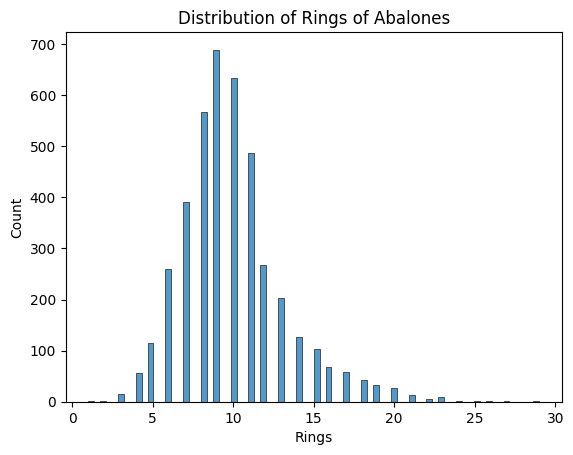

In [45]:
# histogram of rings of abalones
sns.histplot(data = df, x = 'Rings')
plt.title('Distribution of Rings of Abalones')

Text(0.5, 1.0, 'Boxplot of the Rings of Abalones')

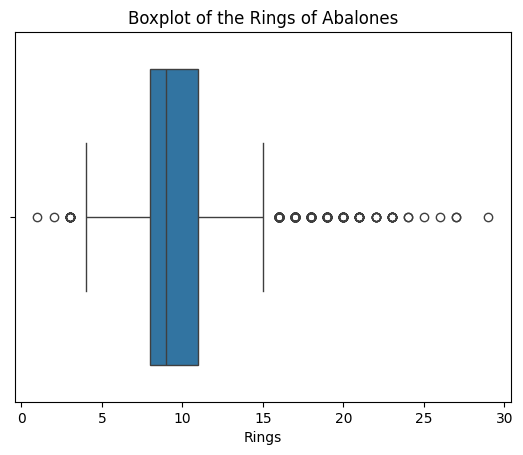

In [46]:
# box plot of rings
sns.boxplot(data = df, x = 'Rings')
plt.title('Boxplot of the Rings of Abalones')

###Initial Visualizations

<ipython-input-47-1f33b6ec2eb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Sex', y = 'Rings', palette = ['blue', 'red', 'purple'])


Text(0.5, 1.0, 'Abalone Sex by Rings')

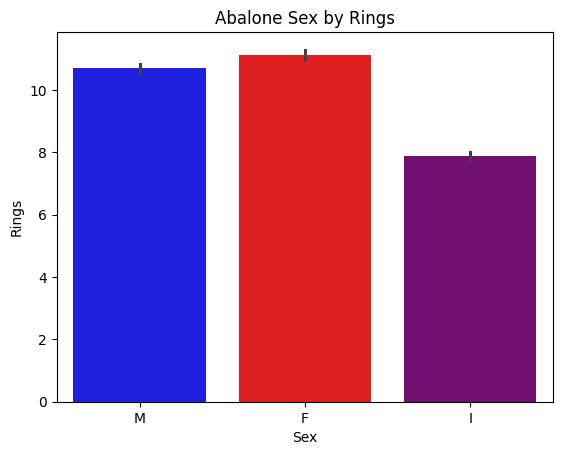

In [47]:
# plot sex (male/female/infant) against rings
sns.barplot(data = df, x = 'Sex', y = 'Rings', palette = ['blue', 'red', 'purple'])
plt.title('Abalone Sex by Rings')

Text(0.5, 1.0, 'Abalone Length vs Rings')

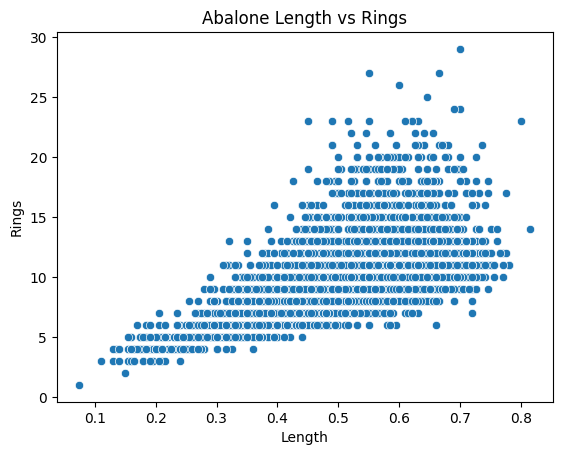

In [48]:
# plot length against rings
sns.scatterplot(data = df, x = 'Length', y = 'Rings')
plt.title('Abalone Length vs Rings')

Text(0.5, 1.0, 'Length vs Height')

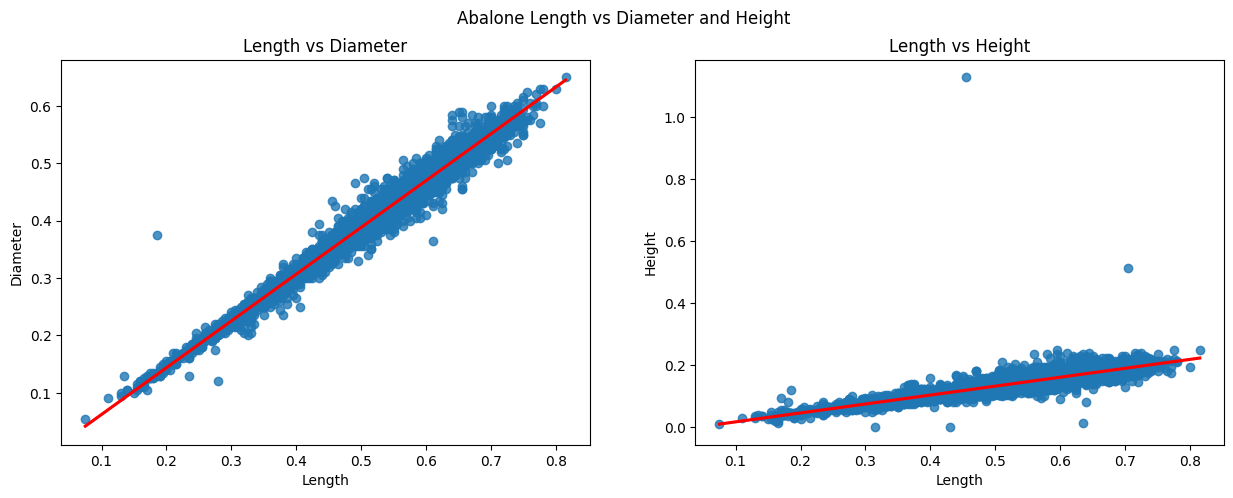

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df, x = 'Length', y = 'Diameter', line_kws = {'color': 'red'}, ax = ax[0])
sns.regplot(data = df, x = 'Length', y = 'Height', line_kws = {'color': 'red'}, ax = ax[1])
plt.suptitle('Abalone Length vs Diameter and Height')
ax[0].set_title('Length vs Diameter')
ax[1].set_title('Length vs Height')

Text(0.5, 1.0, 'Abalone Whole Weight vs Rings')

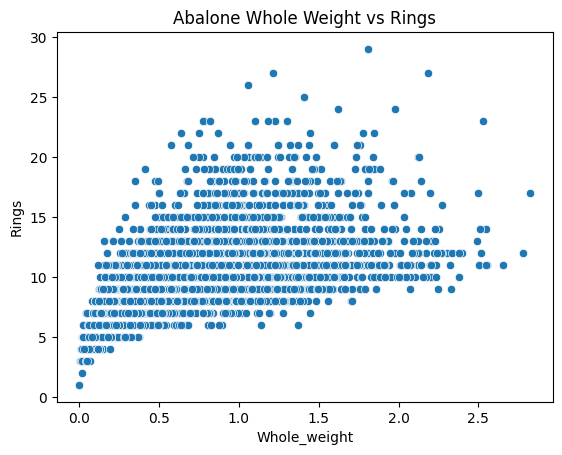

In [50]:
# plot whole weight against rings
sns.scatterplot(data = df, x = 'Whole_weight', y = 'Rings')
plt.title('Abalone Whole Weight vs Rings')

Text(0.5, 1.0, 'Whole Weight vs Shell Weight')

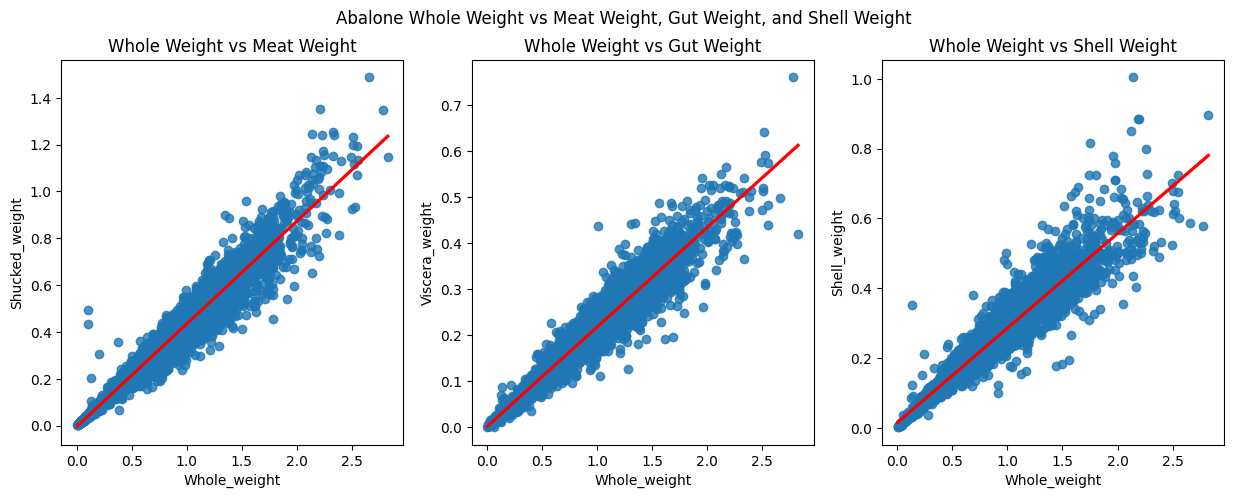

In [51]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.regplot(data = df, x = 'Whole_weight', y = 'Shucked_weight', line_kws = {'color': 'red'}, ax = ax[0])
sns.regplot(data = df, x = 'Whole_weight', y = 'Viscera_weight', line_kws = {'color': 'red'}, ax = ax[1])
sns.regplot(data = df, x = 'Whole_weight', y = 'Shell_weight', line_kws = {'color': 'red'}, ax = ax[2])
plt.suptitle('Abalone Whole Weight vs Meat Weight, Gut Weight, and Shell Weight')
ax[0].set_title('Whole Weight vs Meat Weight')
ax[1].set_title('Whole Weight vs Gut Weight')
ax[2].set_title('Whole Weight vs Shell Weight')